In [49]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import lxml.html as lh
import bs4 as bs
import urllib.request
import json
!conda install -c conda-forge geopy --yes  lab
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0 --yes
import csv


Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

#### Data 1: Neighborhood in New York City. There are total of 306 neighborhood.
#### Data 2: Must have a High Gross Domestic Product where the restaurant place.
#### Data 3: Must have a high population.
#### Data 4: After choosing a borough, the wealthiest neighborhood of a borough will be chosen.
#### Data 5: Foursquare API 


In [ ]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json

In [ ]:

with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']


column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 


neighborhoodsinnewyork = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoodsinnewyork = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoodsinnewyork.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [ ]:
len(neighborhoodsinnewyork['Borough'].unique()),neighborhoodsinnewyork.shape[0]

(5, 306)

#### -> There are 306 Neighborhoods and 5 Borough includes Bronx, Manhattan, Brooklyn, Queens, and Staten Island

In [ ]:
neighborhoodsinnewyork.to_csv('BON1_NYC_GEO.csv',index=False)
address = 'New York City, NY'
geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10.5)
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.5,
        parse_html=False).add_to(mapofNewYork)  
    
mapofNewYork

In [ ]:
from bs4 import BeautifulSoup
import csv
import pandas as pd
data = {'Borough': ['The Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
        'Gross Domestic Product': [28787,63303,629682,73842,11249]
        }

df_nyc = pd.DataFrame(data)
df_nyc

,Borough,Gross Domestic Product
0,The Bronx,28787
1,Brooklyn,63303
2,Manhattan,629682
3,Queens,73842
4,Staten Island,11249


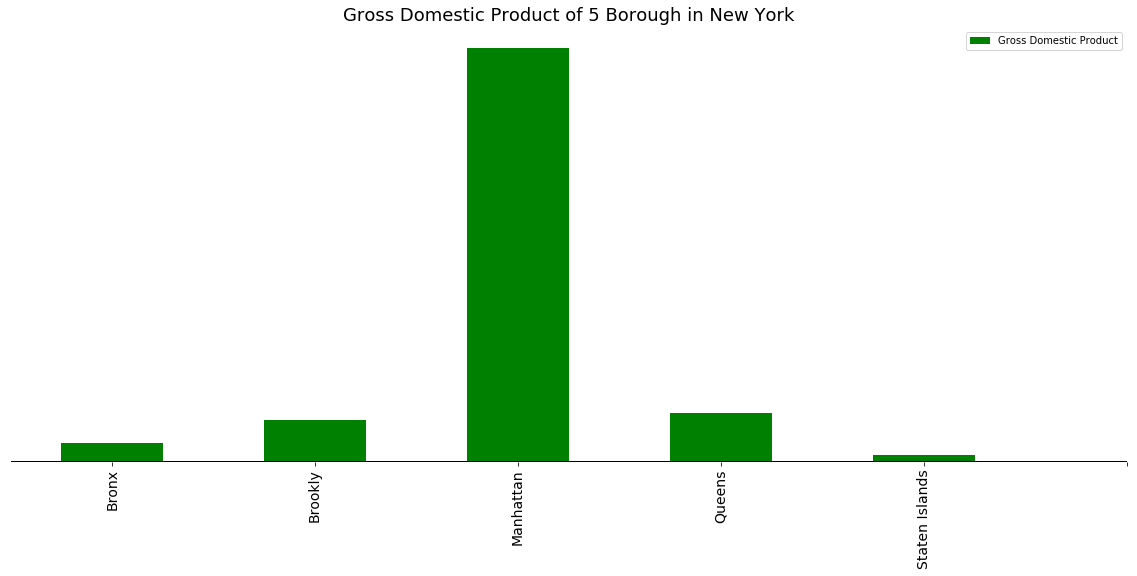

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns

df_nyc.plot(kind='bar',width=0.5,figsize=(20, 8), color=['green'],)
plt.title('Gross Domestic Product of 5 Borough in New York',size=18)
plt.ylabel('y')
plt.xticks(np.arange(6), ('Bronx', 'Brookly', 'Manhattan', 'Queens', 'Staten Islands'),size=14)
plt.box(on=None)
plt.axhline(linewidth=2, color='black')
plt.gca().axes.get_yaxis().set_visible(False)
plt.xticks(rotation=90) 
plt.show()

In [ ]:
data2 = {'Borough': ['The Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
        'Population': [1471160,2648771,1664727,2358582,479458]
        }

df_nyc_population = pd.DataFrame(data2)
df_nyc_population

,Borough,Population
0,The Bronx,1471160
1,Brooklyn,2648771
2,Manhattan,1664727
3,Queens,2358582
4,Staten Island,479458


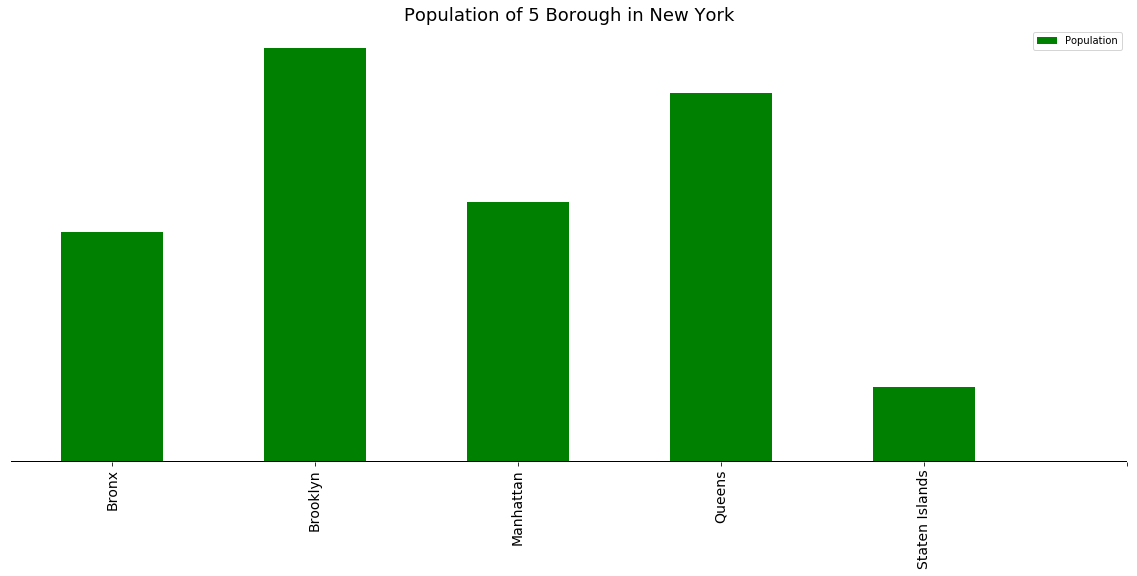

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns

df_nyc_population.plot(kind='bar',width=0.5,figsize=(20, 8), color=['green'],)
plt.title('Population of 5 Borough in New York',size=18)
plt.ylabel('y')
plt.xticks(np.arange(6), ('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Islands'),size=14)
plt.box(on=None)
plt.axhline(linewidth=2, color='black')
plt.gca().axes.get_yaxis().set_visible(False)
plt.xticks(rotation=90) 
plt.show()

#### Choose wealthiest neighborhood
#### --> Manhattan and Brooklyn are chosen because of Gross Domestic Product and Population

In [ ]:
data3 = {'Neighborhood': ['Battery Park City','Tribeca','Columbus Circle','Financial District','Noho','Flatiron','Tudor City/Turtle Bay/Sutton Place','Murray Hill','Upper East Side','West Village'],
        'Income': [105000,98000,88000,84000,80000,77000,75000,74000,73000,68700]
        }

df_manhattan = pd.DataFrame(data3)
df_manhattan

,Neighborhood,Income
0,Battery Park City,105000
1,Tribeca,98000
2,Columbus Circle,88000
3,Financial District,84000
4,Noho,80000
5,Flatiron,77000
6,Tudor City/Turtle Bay/Sutton Place,75000
7,Murray Hill,74000
8,Upper East Side,73000
9,West Village,68700


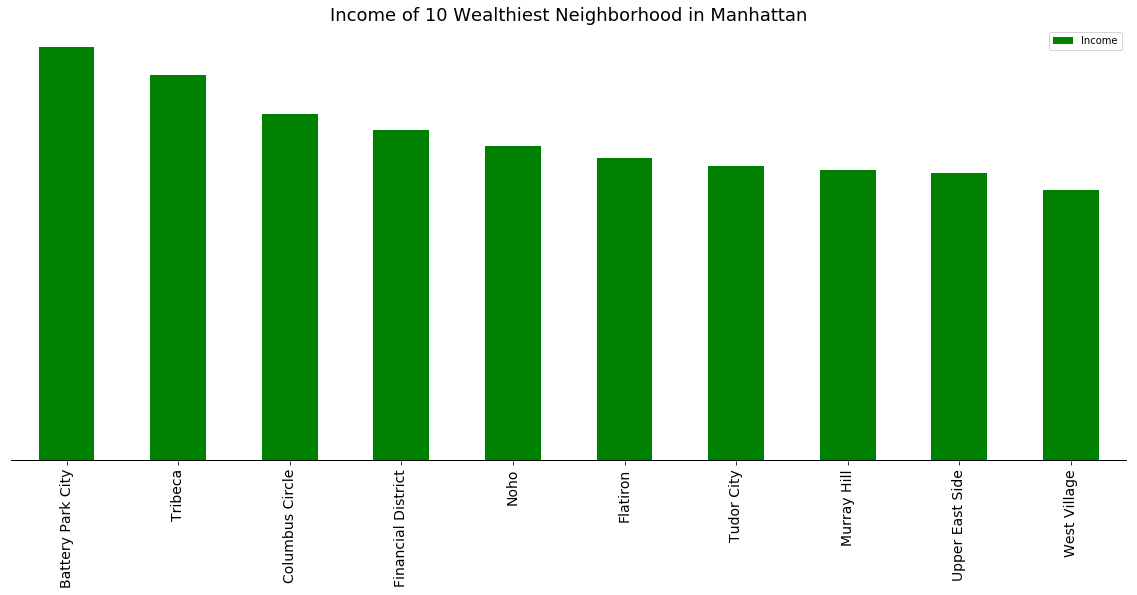

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns
df_manhattan.plot(kind='bar',width=0.5,figsize=(20, 8), color=['green'],)
plt.title('Income of 10 Wealthiest Neighborhood in Manhattan',size=18)
plt.ylabel('y')
plt.xticks(np.arange(10), ('Battery Park City','Tribeca','Columbus Circle','Financial District','Noho','Flatiron','Tudor City','Murray Hill','Upper East Side','West Village'),size=14)
plt.box(on=None)
plt.axhline(linewidth=2, color='black')
plt.gca().axes.get_yaxis().set_visible(False)
plt.xticks(rotation=90) 
plt.show()

In [ ]:
data4 = {'Neighborhood': ['DUMBO','Brooklyn Heights','Carroll Gardens','Downtown Brooklyn','Park Slope','Boerum Hill','Cobble Hill','CLinton Hill','Windsor Terrace','Williamsburg'],
        'Income': [76000,59000,57000,56000,49000,47000,43000,40000,40000,38000]
        }

df_brooklyn = pd.DataFrame(data3)
df_brooklyn

,Neighborhood,Income
0,Battery Park City,105000
1,Tribeca,98000
2,Columbus Circle,88000
3,Financial District,84000
4,Noho,80000
5,Flatiron,77000
6,Tudor City/Turtle Bay/Sutton Place,75000
7,Murray Hill,74000
8,Upper East Side,73000
9,West Village,68700


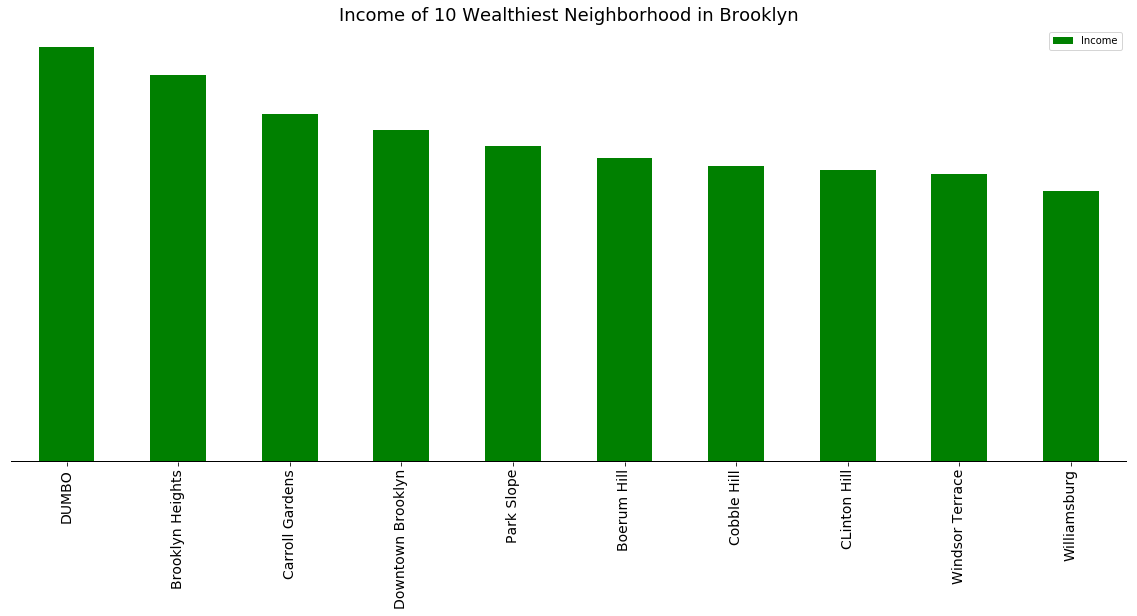

In [ ]:
df_manhattan.plot(kind='bar',width=0.5,figsize=(20, 8), color=['green'],)
plt.title('Income of 10 Wealthiest Neighborhood in Brooklyn',size=18)
plt.ylabel('y')
plt.xticks(np.arange(10), ('DUMBO','Brooklyn Heights','Carroll Gardens','Downtown Brooklyn','Park Slope','Boerum Hill','Cobble Hill','CLinton Hill','Windsor Terrace','Williamsburg'),size=14)
plt.box(on=None)
plt.axhline(linewidth=2, color='black')
plt.gca().axes.get_yaxis().set_visible(False)
plt.xticks(rotation=90) 
plt.show()

# Clustering neighborhood

In [ ]:
NYCGeo=pd.read_csv('BON1_NYC_GEO.csv')
print('Data downloaded!')

Data downloaded!
['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']


In [ ]:
ManBrookGeo = NYCGeo.loc[(NYCGeo['Borough'] == 'Brooklyn')|(NYCGeo['Borough'] == 'Manhattan')]
ManBrookGeo = ManBrookGeo.reset_index(drop=True)
ManBrookGeo.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Brooklyn,Bay Ridge,40.625801,-74.030621
2,Brooklyn,Bensonhurst,40.611009,-73.995180
3,Brooklyn,Sunset Park,40.645103,-74.010316
4,Brooklyn,Greenpoint,40.730201,-73.954241


In [ ]:
import time
start_time = time.time()

address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
mapManBrook = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, borough, neighborhood in zip(QM_Geo['Latitude'], QM_Geo['Longitude'], QM_Geo['Borough'], QM_Geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.5,
        parse_html=False).add_to(map_QM)  
    
mapManBrook

In [ ]:
CLIENT_ID = 'CP55KLDQS4VCO1HZI15VXXYE1AFGEDTQXSKSH0LBMH2WSQTU' # your Foursquare ID
CLIENT_SECRET = 'U3ZP4AAN2DCDM34K0ALS0ENHXJHNVMB5ZE512LOU0L2Z4MET' # your Foursquare Secret
VERSION = '20181218' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CP55KLDQS4VCO1HZI15VXXYE1AFGEDTQXSKSH0LBMH2WSQTU
CLIENT_SECRET:U3ZP4AAN2DCDM34K0ALS0ENHXJHNVMB5ZE512LOU0L2Z4MET


In [ ]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
       
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


ManBrookstores = getNearbyVenues(names=ManBrookGeo['Neighborhood'],
                                  latitudes=ManBrookGeo['Latitude'],
                                  longitudes=ManbrookGeo['Longitude'],
                                  LIMIT=200)

print('The dataframe has {} venues and {} unique types.'.format(
      len(ManBrookstores['Venue Category']),
      len(ManBrookstores['Venue Category'].unique())))

ManBrookstores.to_csv('QM_venues.csv', sep=',', encoding='UTF8')
ManBrookstores.head()

Marble Hill
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [ ]:
def Venues_Map(Borough_name, Borough_neighborhoods):
    
    
    geolocator = Nominatim(user_agent="Jupyter")
    Borough_location = geolocator.geocode(Manhattan) 
    Borough_latitude = Borough_location.latitude
    Borough_longitude = Borough_location.longitude
    print('The geographical coordinates of "{}" are {}, {}.'.format(Borough_name, Borough_latitude, Borough_longitude))
    
    
    print('The "{}" dataframe has {} different venue types and {} neighborhoods.'.format(
          Borough_name,
          len(Borough_neighborhoods['VenueCategory'].unique()),
          len(Borough_neighborhoods['Neighborhood'].unique())))
    
    
    map_Borough = folium.Map(location=[Borough_latitude, Borough_longitude], zoom_start=10)

   
    for lat, lng, venue, category in zip(Borough_neighborhoods['VenueLatitude'], Borough_neighborhoods['VenueLongitude'], Borough_neighborhoods['Venue'], Borough_neighborhoods['VenueCategory']):
        label = '{}, {}'.format(category, venue)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=0.1,
            popup=label,
            color='red',
            fill=True,
            fill_color='#FF0000',
            fill_opacity=0.3).add_to(map_Borough)  

    return BoroughMap

In [ ]:
colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
ManBrookstores = pd.read_csv('ManBrookstores.csv', skiprows=1, names=colnames)
ManBrookstores.columns = ManBrookstores.columns.str.replace(' ', '')
ManBrookstores.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

VenueCategory
Pizza Place                                 385
Coffee Shop                                 327
Italian Restaurant                          244
Bakery                                      220
Café                                        207
Bar                                         206
Park                                        187
American Restaurant                         178
Grocery Store                               176
Deli / Bodega                               154
Ice Cream Shop                              153
Mexican Restaurant                          150
Sandwich Place                              150
Caribbean Restaurant                        147
Gym / Fitness Center                        140
Chinese Restaurant                          135
Gym                                         134
Cocktail Bar                                134
Wine Shop                                   131
Sushi Restaurant                            125
Donut Shop                

## -> There are total 110 sushi restaurants

In [ ]:
import pandas as pd
ManBrooksort = pd.get_dummies(ManBrookstores[['VenueCategory']], prefix="", prefix_sep="")

column_names = ['Neighborhood'] + list(ManBrooksort.columns)

ManBrooksort['Neighborhood'] = ManBrookstores['Neighborhood'] 

ManBrooksort = ManBrooksort[column_names]



In [ ]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List
ManBrookrestaurants = ManBrooksort[col_name]
ManBrookrestaurants = ManBrookrestaurants.iloc[:,1::]
ManBrookrestaurants_grouped = QM_restaurant.groupby('Neighborhood').sum().reset_index()
ManBrookrestaurants_grouped['Total'] = ManBrookrestaurants_grouped .sum(axis=1)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ManBrookrestaurants_clustering = ManBrookrestaurants_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(QM_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(QM_grouped_clustering, label, metric='euclidean')
   

In [ ]:
# set number of clusters
kclusters = 2

ManBrookrestaurants_clustering = ManBrookrestaurants_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ManBrookrestaurants_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int32)

In [ ]:
ManBrookfinal = pd.DataFrame(kmeans.cluster_centers_)
ManBrookfinal.columns = ManBrookrestaurants_clustering.columns
ManBrookfinal.index = ['cluster0','cluster1']
ManBrookfinal['Total Sum'] = ManBrookfinal.sum(axis = 1)
ManBrookfinal

,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Persian Restaurant,Peruvian Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total,Total Sum
cluster0,0.097561,1.024390,-1.387779e-17,0.024390,0.097561,-6.938894e-17,1.387779e-17,-3.469447e-18,0.024390,1.040834e-17,-1.387779e-17,1.853659,0.024390,0.975610,0.024390,0.097561,-3.469447e-18,2.081668e-17,0.073171,-6.938894e-18,-3.469447e-18,4.163336e-17,0.121951,1.146341,-1.387779e-17,0.219512,0.073171,-2.775558e-16,0.024390,0.146341,-6.938894e-18,0.951220,0.048780,0.512195,1.040834e-17,-1.734723e-18,5.551115e-17,1.040834e-17,0.463415,1.387779e-17,2.775558e-17,0.268293,0.439024,0.170732,-3.469447e-18,2.775558e-17,0.195122,1.040834e-17,0.121951,-2.775558e-17,0.463415,0.121951,-1.734723e-18,0.634146,2.775558e-17,1.040834e-17,0.073171,0.146341,0.170732,0.560976,-1.734723e-18,2.775558e-17,0.024390,0.073171,0.073171,-6.938894e-18,-1.734723e-18,0.097561,-3.469447e-18,0.048780,11.707317,23.414634
cluster1,0.072464,1.971014,1.159420e-01,0.101449,0.550725,1.304348e-01,1.014493e-01,2.898551e-02,0.043478,4.347826e-02,1.159420e-01,1.028986,0.057971,1.376812,0.086957,0.289855,2.898551e-02,8.695652e-02,0.159420,5.797101e-02,2.898551e-02,1.739130e-01,0.159420,0.318841,1.159420e-01,1.101449,0.115942,5.217391e-01,0.057971,0.884058,5.797101e-02,2.971014,0.072464,1.434783,4.347826e-02,1.449275e-02,4.057971e-01,4.347826e-02,0.797101,1.014493e-01,7.246377e-02,0.637681,1.913043,0.463768,2.898551e-02,7.246377e-02,0.768116,4.347826e-02,0.144928,3.768116e-01,0.739130,0.246377,1.449275e-02,1.043478,7.246377e-02,4.347826e-02,0.173913,0.391304,0.434783,1.478261,1.449275e-02,7.246377e-02,0.333333,0.971014,0.246377,5.797101e-02,1.449275e-02,0.681159,2.898551e-02,0.550725,28.000000,56.000000


In [ ]:
ManBrookfinal_merged = pd.DataFrame(ManBrookrestaurants_grouped['Neighborhood'])

ManBrookfinal_merged['Total'] = ManBrookrestaurants_grouped['Total']
ManBrookfinal_merged = ManBrookfinal_merged.assign(Cluster_Labels = kmeans.labels_)
ManBrookfinal_merged

(110, 3)


,Neighborhood,Total,Cluster_Labels
0,Bath Beach,33,1
1,Battery Park City,7,0
2,Bay Ridge,35,1
3,Bedford Stuyvesant,21,1
4,Bensonhurst,26,1
5,Bergen Beach,2,0
6,Boerum Hill,17,0
7,Borough Park,6,0
8,Brighton Beach,21,1
9,Broadway Junction,8,0


In [ ]:
ManBrookGeo = NYCGeo.loc[(NYCGeo['Borough'] == 'Brooklyn')|(NYCGeo['Borough'] == 'Manhattan')]
ManBrookGeo = ManBrookGeo.reset_index(drop=True)
ManBrookmerged = ManBrookGeo

ManBrookmerged = ManBrookmerged.join(ManBrookmerged.set_index('Neighborhood'), on='Neighborhood')

print(ManBrookmerged.shape)
ManBrookmerged.head(20) 


Data downloaded!
['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']
(110, 6)


,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,13,0
1,Brooklyn,Bay Ridge,40.625801,-74.030621,35,1
2,Brooklyn,Bensonhurst,40.611009,-73.995180,26,1
3,Brooklyn,Sunset Park,40.645103,-74.010316,39,1
4,Brooklyn,Greenpoint,40.730201,-73.954241,20,1
5,Brooklyn,Gravesend,40.595260,-73.973471,8,0
6,Brooklyn,Brighton Beach,40.576825,-73.965094,21,1
7,Brooklyn,Sheepshead Bay,40.586890,-73.943186,31,1
8,Brooklyn,Manhattan Terrace,40.614433,-73.957438,19,0
9,Brooklyn,Flatbush,40.636326,-73.958401,32,1


In [ ]:
import folium # map rendering library
# create map


map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ManBrookmerged['Latitude'], ManBrookmerged['Longitude'], ManBrookmerged['Neighborhood'], ManBrookmerged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters